#### Importing the necessary libraaries

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import*
from fastai.vision import *
from fastai.metrics import error_rate
import pandas as pd

In [3]:
batch_size =64

#### Setting the path 

In [4]:
path = "C:/Users/shahi/.fastai/data/histopathologic-cancer-detection"

In [5]:
path_trn = path+'/train'
path_labels = path+'/train_labels.csv'

In [6]:
path_trn
path_labels

'C:/Users/shahi/.fastai/data/histopathologic-cancer-detection/train_labels.csv'

###  Visualizibg the images

In [7]:
fnames = get_image_files(path_trn)
fnames[:5]

[WindowsPath('C:/Users/shahi/.fastai/data/histopathologic-cancer-detection/train/00001b2b5609af42ab0ab276dd4cd41c3e7745b5.tif'),
 WindowsPath('C:/Users/shahi/.fastai/data/histopathologic-cancer-detection/train/000020de2aa6193f4c160e398a8edea95b1da598.tif'),
 WindowsPath('C:/Users/shahi/.fastai/data/histopathologic-cancer-detection/train/00004aab08381d25d315384d646f5ce413ea24b1.tif'),
 WindowsPath('C:/Users/shahi/.fastai/data/histopathologic-cancer-detection/train/0000d563d5cfafc4e68acb7c9829258a298d9b6a.tif'),
 WindowsPath('C:/Users/shahi/.fastai/data/histopathologic-cancer-detection/train/0000da768d06b879e5754c43e2298ce48726f722.tif')]

In [8]:
import os
os.getcwd()

'C:\\Users\\shahi\\course-v3\\nbs\\dl1'

In [9]:
path_labels

'C:/Users/shahi/.fastai/data/histopathologic-cancer-detection/train_labels.csv'

In [10]:
df = pd.read_csv(path_labels)

In [11]:
len(fnames)

220025

In [12]:
idd = df.iloc[0,0]

In [13]:
idd

'f38a6374c348f90b587e046aac6079959adf3835'

In [47]:
data = (ImageList.from_csv(path=path,csv_name="train_labels.csv",folder="train",suffix=".tif")
       .split_by_rand_pct()
       .label_from_df()
       .transform(tfms=get_transforms(),size=96)
       .databunch(bs=16)
       .normalize(imagenet_stats)) 

In [26]:
data.c

2

In [135]:
len(data.train_ds[4])

2

In [45]:
for name in data.classes:
    if name == "0":
        data.classes = "Non Cacner"
    else:
        data.classes = "Cancer"

In [44]:
data.c

2

In [48]:
data.classes

[0, 1]

In [52]:
data.classes[0] = "Non Cancer"
data.classes[1] = "Cancer"

In [53]:
data.classes

['Non Cancer', 'Cancer']

In [137]:
data.train_ds

LabelList (176020 items)
x: ImageList
Image (3, 96, 96),Image (3, 96, 96),Image (3, 96, 96),Image (3, 96, 96),Image (3, 96, 96)
y: CategoryList
Non Cancer,Cancer,Non Cancer,Non Cancer,Cancer
Path: C:\Users\shahi\.fastai\data\histopathologic-cancer-detection

In [138]:
data.valid_ds

LabelList (44005 items)
x: ImageList
Image (3, 96, 96),Image (3, 96, 96),Image (3, 96, 96),Image (3, 96, 96),Image (3, 96, 96)
y: CategoryList
Cancer,Non Cancer,Non Cancer,Non Cancer,Non Cancer
Path: C:\Users\shahi\.fastai\data\histopathologic-cancer-detection

In [141]:
len(data.train_dl)

11001

In [143]:
len(data.valid_dl)

2751

In [144]:
len(data.train_ds)

176020

In [139]:
data.valid_dl

DeviceDataLoader(dl=<torch.utils.data.dataloader.DataLoader object at 0x0000020227F5EB00>, device=device(type='cuda', index=0), tfms=[functools.partial(<function _normalize_batch at 0x00000201AD2C1D08>, mean=tensor([0.4850, 0.4560, 0.4060]), std=tensor([0.2290, 0.2240, 0.2250]), do_x=True, do_y=False)], collate_fn=<function data_collate at 0x00000201A5B83BF8>)

In [136]:
len(data.valid_ds)

44005

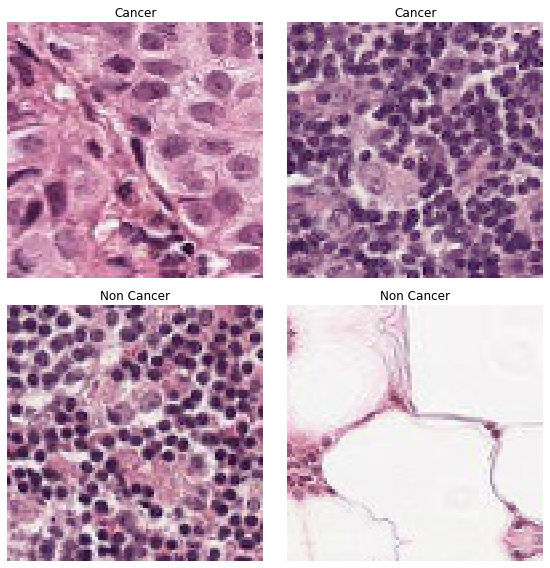

In [55]:
data.show_batch(rows=2)

In [16]:
learn = cnn_learner(data,models.resnet34,metrics=[error_rate,accuracy])

In [17]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [18]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.330246,0.255633,0.101466,0.898534,13:08
1,0.307833,0.209499,0.079355,0.920645,14:18
2,0.274435,0.196998,0.075105,0.924895,14:20


AttributeError: 'NoneType' object has no attribute 'fp_16'

In [19]:
learn.save("stage-2")

In [20]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


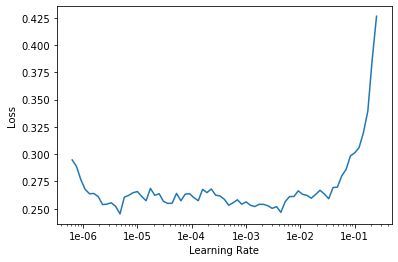

In [21]:
learn.recorder.plot()

In [22]:
learn.unfreeze()
learn.fit_one_cycle(4,1e-6)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.280175,0.200826,0.077128,0.922872,16:45
1,0.226339,0.192966,0.073560,0.926440,17:04
2,0.237956,0.183487,0.068719,0.931281,16:28
3,0.253743,0.188484,0.071992,0.928008,17:06


In [23]:
learn.save('stage-3')

In [24]:
learn.fit_one_cycle(4, max_lr=slice(1e-6,1e-3),wd=1e-2)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.240689,0.173619,0.064674,0.935326,16:28
1,0.193708,0.155643,0.057062,0.942938,16:43
2,0.180938,0.147707,0.053539,0.946461,16:37
3,0.170729,0.135334,0.048199,0.951801,16:58


In [25]:
learn.save('stage-4')

### Interpretting the results

In [56]:
inter = ClassificationInterpretation.from_learner(learn)
losses,indx = inter.top_losses()

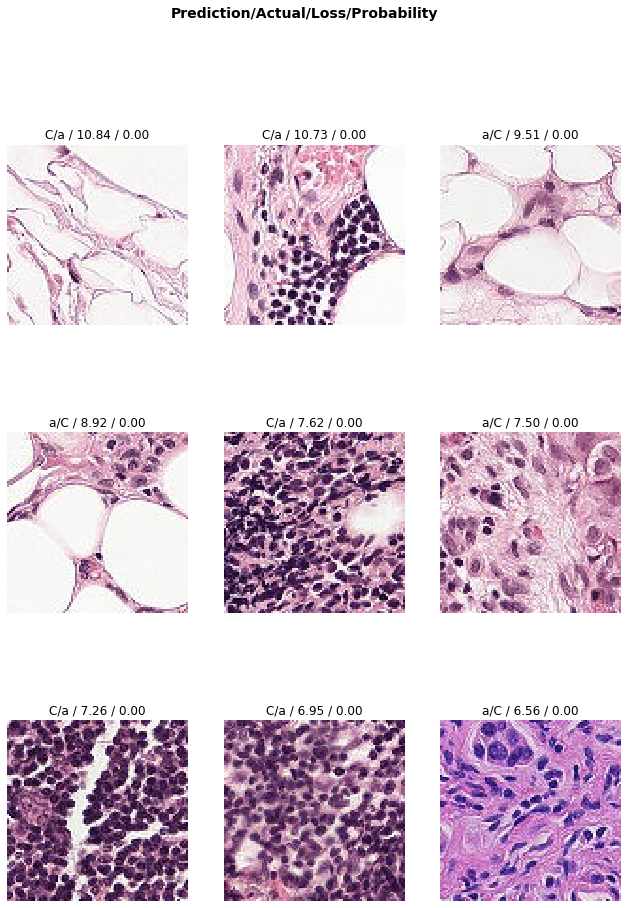

In [57]:
inter.plot_top_losses(9,figsize=(11,15))


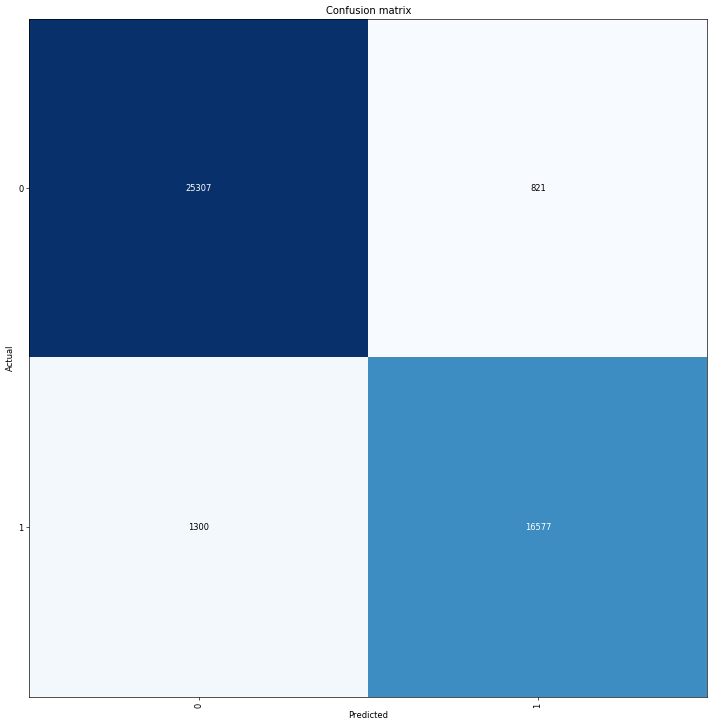

In [58]:
inter.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [71]:
learn.export()

In [72]:
learn.load('stage-4')

Learner(data=ImageDataBunch;

Train: LabelList (176020 items)
x: ImageList
Image (3, 96, 96),Image (3, 96, 96),Image (3, 96, 96),Image (3, 96, 96),Image (3, 96, 96)
y: CategoryList
0,1,0,0,0
Path: C:\Users\shahi\.fastai\data\histopathologic-cancer-detection;

Valid: LabelList (44005 items)
x: ImageList
Image (3, 96, 96),Image (3, 96, 96),Image (3, 96, 96),Image (3, 96, 96),Image (3, 96, 96)
y: CategoryList
0,0,0,0,0
Path: C:\Users\shahi\.fastai\data\histopathologic-cancer-detection;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05,

In [124]:
img = open_image(path+'/test'+'/00a9d5b70627a6c469dc3b250b7750825e85ec65.tif')

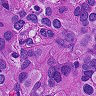

In [125]:
img

In [89]:
learn = load_learner(path)

In [126]:
pred_Class,pred_indx,outputs = learn.predict(img)


In [127]:
pred_Class

Category 1

In [128]:
if pred_Class.obj == 0:
    Predclass = "No cancer"
else:
    Predclass="Cancer"

In [129]:
pred_Class

Category 1

In [130]:
Predclass

'Cancer'

In [80]:
type(pred_Class)

fastai.core.Category

In [131]:
outputs

tensor([0.0039, 0.9961])

In [121]:
pred_Class.obj

1

In [123]:
defaults.device = torch.device('cpu')